In [1]:

from langchain_openai import ChatOpenAI
# Loading the functions from the differnet scripts
from scripts.llm_question_Answering import extract_docs_db, ASK_Question_On_Your_Documents
from VECTOR_STORE.webscrapped_data_ingest import filter_website_content_and_save_vectorstore
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import START, StateGraph, END
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display, Markdown
from langchain_openai import OpenAIEmbeddings
import os


from dotenv import load_dotenv

load_dotenv(override=True)

USER_AGENT environment variable not set, consider setting it to identify your requests.


True

### User Interface Overview

In the user interface, a set of **Frequently Asked Questions (FAQs)** will be displayed by default. Additionally, users will have the following options:

- Contact the **Aptus Team**
- **Book a session**
- **Talk to AI agent**

---

Upon initiating contact with an agent, the user will be greeted with the following prompt:

> **Agent:** "Hello! To proceed, please kindly provide your name."

In the meantime, the system will load the vector store along with a **thread ID**.


In [2]:
ans = """<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Contact Us Widget</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0-beta3/css/all.min.css"> <!-- Font Awesome CDN -->
    <style>
        .contact-widget {
            border-radius: 12px;
            background-color: #e0f7fa; /* Light cyan background */
            padding: 10px; /* Reduced padding */
            box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
            max-width: 210px; /* Reduced max-width by 30% */
            text-align: center; /* Center align text */
            font-size: 0.75em; /* Smaller font size */
            margin: 10px; /* Adjusted margin */
        }

        h2 {
            font-size: 1.2em; /* Smaller heading size */
            color: #00796b; /* Dark teal */
            margin-bottom: 10px; /* Reduced margin */
            font-weight: bold;
        }

        p {
            margin: 5px 0; /* Reduced margin */
            color: #555; /* Grey text */
        }

        .contact-link {
            display: block;
            background-color: #00796b; /* Dark teal */
            color: #ffffff; /* White text */
            padding: 6px; /* Reduced padding */
            border-radius: 8px;
            text-decoration: none;
            font-weight: bold;
            transition: background-color 0.3s;
            margin-top: 6px; /* Adjusted margin */
            font-size: 0.75em; /* Consistent font size */
        }

        .contact-link:hover {
            background-color: #004d40; /* Darker teal on hover */
        }

        .map-link {
            color: #00796b; /* Dark teal */
            text-decoration: underline;
            font-weight: bold;
            font-size: 0.75em; /* Consistent font size */
        }

        .map-link:hover {
            color: #004d40; /* Darker teal on hover */
        }

        .separator {
            margin: 10px 0; /* Reduced margin */
            border-top: 1px solid #D9D9D9;
        }

        .phone-item, .map-item {
            display: flex; /* Use flexbox for alignment */
            align-items: center; /* Center vertically */
            justify-content: center; /* Center horizontally */
            margin: 5px 0; /* Add some spacing between items */
        }

        .phone-icon {
            font-size: 12px; /* Reduced phone icon size */
            color: #00796b; /* Dark teal color */
            margin-right: 5px; /* Space between icon and text */
        }

        .map-icon {
            font-size: 12px; /* Set map icon size to 12px */
            color: #00796b; /* Dark teal color */
            margin-right: 5px; /* Space between icon and text */
        }

        /* Custom style to remove blue color and underline from phone number */
        .phone-item a {
            color: #555; /* Grey color */
            text-decoration: none; /* Remove underline */
            font-weight: bold; /* Make it bold */
        }

        .phone-item a:hover {
            color: #00796b; /* Dark teal on hover */
        }
    </style>
</head>
<body>

    <div class="contact-widget">
        <h2>Contact Us</h2>
        <p><strong>Address:</strong><br>
            Novel Tech Park,<br>
            #46/4, GB Palya,<br>
            Bengaluru, India
        </p>

        <div class="separator"></div>
        
        <p><strong>Call Us:</strong></p>
        <div class="phone-item">
            <i class="fas fa-phone phone-icon"></i>
            <a href="tel:+918861769911">+91 8861769911</a>
        </div>
        <div class="phone-item">
            <i class="fas fa-phone phone-icon"></i>
            <a href="tel:+918861799911">+91 8861799911</a>
        </div>

        <div class="separator"></div>

        <p><strong>Email Us:</strong></p>
        <a class="contact-link" href="https://mail.google.com/mail/?view=cm&fs=1&to=info@aptusdatalabs.com&su=Subject&body=Body" target="_blank">info@aptusdatalabs.com</a>

        <div class="separator"></div>

        <p><strong>Find Us:</strong></p>
        <div class="map-item">
            <i class="fas fa-map-marker-alt map-icon"></i>
            <a class="map-link" href="https://www.google.com/maps/place/Aptus+Data+Labs/@12.9267067,77.6117037,12z/data=!3m1!5s0x3bae1355494bf753:0xce7dd086ff96569d!4m6!3m5!1s0x3bae14babba2a23f:0xaaf5f77b09862c72!8m2!3d12.8914625!4d77.641484!16s%2Fg%2F11bv6ptkmh?entry=ttu&g_ep=EgoyMDI0MTAxNS4wIKXMDSoASAFQAw%3D%3D" target="_blank">View on Map</a>
        </div>

        <div class="separator"></div>

        <p><strong>Working Hours:</strong><br>
            Mon-Fri: 9:30 AM - 6:00 PM<br>
            Sat & Sun: Closed
        </p>
    </div>

</body>
</html>

"""

In [3]:
from IPython.display import display, HTML
display(HTML(ans))

In [ ]:

contact_widget2= """<div style="border: 2px solid black; padding: 20px; max-width: 300px; font-family: Arial, sans-serif; background-color: rgb(249, 250, 252); border-radius: 10px;">
    <h2 style="text-align: center; color: #003366;">Aptus Data Labs</h2> <!-- Darker indigo shade -->
    
    
    
    <p style="text-align: center;"><strong style="color: #80C840;">Email:</strong><br>
      <a href="mailto:info@aptusdatalabs.com" style="color: #007FFF; text-decoration: none;">info@aptusdatalabs.com</a><br>
    </p>
    
    <p style="text-align: center;"><strong style="color: #80C840;">Phone:</strong><br> 
        +91 8861769911 <br>
        +91 8861799911
    </p>

    <p style="text-align: center;"><strong style="color: #80C840;">Address:</strong><br> 
      Novel Tech Park, #46/4, GB Palya, Near Kudlu Gate, <br> 
      Hosur Main Road, Bengaluru, India, Pin : 560068</p>
    
    <div style="text-align: center; margin-top: 15px;">
      <a href="https://twitter.com/yourcompany" target="_blank" style="margin-right: 10px; display: inline-block;">
        <img src="./icons/twitter.png" alt="Twitter" style="width: 30px; height: 30px; border-radius: 0%; background-color: #ffffff;">
      </a>
      <a href="https://www.instagram.com/Aptusdatalabs/" target="_blank" style="margin-right: 10px; display: inline-block;">
        <img src="./icons/instagram.png" alt="Instagram" style="width: 30px; height: 30px; border-radius: 0%; background-color: #ffffff;">
      </a>
      <a href="https://www.linkedin.com/company/aptusdatalabs/" target="_blank" style="margin-right: 10px; display: inline-block;">
        <img src="./icons/linkedin.png" alt="LinkedIn" style="width: 30px; height: 30px; border-radius: 0%; background-color: #ffffff;">
      </a>
      <a href="https://api.whatsapp.com/send/?phone=8861769911&text&type=phone_number&app_absent=0" target="_blank" style="margin-right: 10px; display: inline-block;">
        <img src="./icons/whatsapp.png" alt="WhatsApp" style="width: 30px; height: 30px; border-radius: 0%; background-color: #ffffff;">
      </a>
      <a href="https://www.youtube.com/channel/UCj-TL3afPSjz5ZcKSKBIjhA" target="_blank" style="margin-right: 10px; display: inline-block;">
        <img src="./icons/youtube.png" alt="YouTube" style="width: 30px; height: 30px; border-radius: 0%; background-color: #ffffff;">
      </a>
      <a href="https://www.threads.net/@aptusdatalabs" target="_blank" style="display: inline-block;">
        <img src="./icons/threads.png" alt="Threads" style="width: 30px; height: 30px; border-radius: 0%; background-color: #ffffff;">
      </a>
    </div>
  </div>
  """
from IPython.display import display, HTML
display(HTML(contact_widget2))

In [11]:
import os
from langchain_openai import ChatOpenAI
key = os.getenv(key="OPENAI_API_KEY")
llm = ChatOpenAI(model="gpt-4o-mini",
                temperature=0,
                max_tokens=None,
                timeout=None,
                max_retries=4)

In [12]:
faiss_folder_path = "./VECTOR_STORE/faiss_store"
trigger = True
if trigger == True:
    # Loading the vectors in the environment
    document_wise_dbs = extract_docs_db(faiss_folder_path)
    print("[INFO]: Successfully loaded the vector store in the system")
# Loading the vectors into the system



def company_contact_details(query: str):
    """ 
    This function gives Give contact details of the company 
    If input query is about company's contact details then always use this function.

    """
    ans = """<!DOCTYPE html>
            <html lang="en">
            <head>
                <meta charset="UTF-8">
                <meta name="viewport" content="width=device-width, initial-scale=1.0">
                <title>Contact Us Widget</title>
                <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0-beta3/css/all.min.css"> <!-- Font Awesome CDN -->
                <style>
                    .contact-widget {
                        border-radius: 12px;
                        background-color: #e0f7fa; /* Light cyan background */
                        padding: 10px; /* Reduced padding */
                        box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
                        max-width: 210px; /* Reduced max-width by 30% */
                        text-align: center; /* Center align text */
                        font-size: 0.75em; /* Smaller font size */
                        margin: 10px; /* Adjusted margin */
                    }

                    h2 {
                        font-size: 1.2em; /* Smaller heading size */
                        color: #00796b; /* Dark teal */
                        margin-bottom: 10px; /* Reduced margin */
                        font-weight: bold;
                    }

                    p {
                        margin: 5px 0; /* Reduced margin */
                        color: #555; /* Grey text */
                    }

                    .contact-link {
                        display: block;
                        background-color: #00796b; /* Dark teal */
                        color: #ffffff; /* White text */
                        padding: 6px; /* Reduced padding */
                        border-radius: 8px;
                        text-decoration: none;
                        font-weight: bold;
                        transition: background-color 0.3s;
                        margin-top: 6px; /* Adjusted margin */
                        font-size: 0.75em; /* Consistent font size */
                    }

                    .contact-link:hover {
                        background-color: #004d40; /* Darker teal on hover */
                    }

                    .map-link {
                        color: #00796b; /* Dark teal */
                        text-decoration: underline;
                        font-weight: bold;
                        font-size: 0.75em; /* Consistent font size */
                    }

                    .map-link:hover {
                        color: #004d40; /* Darker teal on hover */
                    }

                    .separator {
                        margin: 10px 0; /* Reduced margin */
                        border-top: 1px solid #D9D9D9;
                    }

                    .phone-item, .map-item {
                        display: flex; /* Use flexbox for alignment */
                        align-items: center; /* Center vertically */
                        justify-content: center; /* Center horizontally */
                        margin: 5px 0; /* Add some spacing between items */
                    }

                    .phone-icon {
                        font-size: 12px; /* Reduced phone icon size */
                        color: #00796b; /* Dark teal color */
                        margin-right: 5px; /* Space between icon and text */
                    }

                    .map-icon {
                        font-size: 12px; /* Set map icon size to 12px */
                        color: #00796b; /* Dark teal color */
                        margin-right: 5px; /* Space between icon and text */
                    }

                    /* Custom style to remove blue color and underline from phone number */
                    .phone-item a {
                        color: #555; /* Grey color */
                        text-decoration: none; /* Remove underline */
                        font-weight: bold; /* Make it bold */
                    }

                    .phone-item a:hover {
                        color: #00796b; /* Dark teal on hover */
                    }
                </style>
            </head>
            <body>

                <div class="contact-widget">
                    <h2>Contact Us</h2>
                    <p><strong>Address:</strong><br>
                        Novel Tech Park,<br>
                        #46/4, GB Palya,<br>
                        Bengaluru, India
                    </p>

                    <div class="separator"></div>
                    
                    <p><strong>Call Us:</strong></p>
                    <div class="phone-item">
                        <i class="fas fa-phone phone-icon"></i>
                        <a href="tel:+918861769911">+91 8861769911</a>
                    </div>
                    <div class="phone-item">
                        <i class="fas fa-phone phone-icon"></i>
                        <a href="tel:+918861799911">+91 8861799911</a>
                    </div>

                    <div class="separator"></div>

                    <p><strong>Email Us:</strong></p>
                    <a class="contact-link" href="https://mail.google.com/mail/?view=cm&fs=1&to=info@aptusdatalabs.com&su=Subject&body=Body" target="_blank">info@aptusdatalabs.com</a>

                    <div class="separator"></div>

                    <p><strong>Find Us:</strong></p>
                    <div class="map-item">
                        <i class="fas fa-map-marker-alt map-icon"></i>
                        <a class="map-link" href="https://www.google.com/maps/place/Aptus+Data+Labs/@12.9267067,77.6117037,12z/data=!3m1!5s0x3bae1355494bf753:0xce7dd086ff96569d!4m6!3m5!1s0x3bae14babba2a23f:0xaaf5f77b09862c72!8m2!3d12.8914625!4d77.641484!16s%2Fg%2F11bv6ptkmh?entry=ttu&g_ep=EgoyMDI0MTAxNS4wIKXMDSoASAFQAw%3D%3D" target="_blank">View on Map</a>
                    </div>

                    <div class="separator"></div>

                    <p><strong>Working Hours:</strong><br>
                        Mon-Fri: 9:30 AM - 6:00 PM<br>
                        Sat & Sun: Closed
                    </p>
                </div>

            </body>
            </html>

"""
    ans = {"chatbot_response":ans ,"sources":["https://aptusdatalabs.com/contact-us/"], "user_query":query,  "query_fomrat":"html"}
    return ans

def ASK_Question_On_Your_Documents_(user_queries):
    """ 
    This function gives answer to the user query on the comoany data.
    **Always Use this function if user asks anything apart from contacting the company.

    """
    
    print("Query type:", type(user_queries))
    print(user_queries)
    # ans = {"chatbot_response":"QNA ANSWER RETREIVED" ,"sources":["https://aptusdatalabs.com/contact-us/"], "user_query":user_queries, "user_query_type":type(user_queries)}
    # return ans
    global document_wise_dbs
    
    
    ans = ASK_Question_On_Your_Documents(user_queries= user_queries, document_wise_dbs=document_wise_dbs, model_name= "gpt-4o")
    # answer is in the format  {"chatbot_response":ans, "sources":sources}
    return ans


[INFO]: Found the following faiss indexes in the ./VECTOR_STORE/faiss_store : [['db_Aptusdatalabs.faiss']]
Loading index:  db_Aptusdatalabs
[INFO]: Successfully loaded the vector store in the system


In [ ]:
ans = ASK_Question_On_Your_Documents_("aptus data labs services")
ans

In [13]:



# System message
sys_msg = SystemMessage(content="You are a helpful AI assistant named: Aptus Buddy at Aptus's website and a part of Aptus. Only English langauge is acceptable.")


# Node
tools = [ASK_Question_On_Your_Documents_,company_contact_details]
llm_with_tools = llm.bind_tools(tools)

# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

# Build graph
# builder = StateGraph(MessagesState)
# builder.add_node("Assistant", tool_calling_llm)
# builder.add_node("tools", ToolNode([ASK_Question_On_Your_Documents_,company_contact_details]))
# builder.add_edge(START, "Assistant")
# builder.add_conditional_edges(
#     "Assistant",
#     # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
#     # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
#     tools_condition,
# )
# builder.add_edge("tools", END)
# memory = MemorySaver()
# graph = builder.compile(checkpointer=memory)



# # View
# display(Image(graph.get_graph().draw_mermaid_png()))


## We are using below graph in the bot - as of 21-10-24

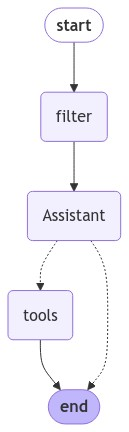

In [ ]:
## Making a new graph to handle trimming
# Nodes
from langchain_core.messages import RemoveMessage
def filter_messages(state: MessagesState):
    # Delete all but the 2 most recent messages
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-6]]
    return {"messages": delete_messages}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("filter", filter_messages)
builder.add_node("Assistant", tool_calling_llm)
builder.add_node("tools", ToolNode([ASK_Question_On_Your_Documents_,company_contact_details]))
builder.add_edge(START, "filter")
builder.add_edge("filter", "Assistant")
builder.add_conditional_edges(
    "Assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)

builder.add_edge("tools", END)
memory = MemorySaver()
graph = builder.compile(checkpointer=memory)
# View
display(Image(graph.get_graph().draw_mermaid_png()))

blog, ttol ----------------------------- email,   --tools
                                    researcher, email_modi, html gen 


In [16]:
from langchain_core.messages import HumanMessage
# Assuming that I got the name and the thread_id, I am initializing the graph
config = {"configurable": {"thread_id": "001"}}

# content = "Name few employee details of the aptus"
# content="Give me the summaries of blogs in your blog sections"
# content = "explain your blog: Demand Sensing Optimising Supply and Demand Mismatch"
# content = "Summarize: Demand Sensing Optimising Supply and Demand Mismatch"
# content = "WHAT IS THE GOAL OF THE COMPANY AND WHO IS THE CEO"
# content = "Give me linkedin and email adress"
content = "how to kill the the team!"
# content = "give me company contact details"
# content = "Hello"
# content = " what was my last question"
messages = [HumanMessage(content=f"{content} # Answer Instructions: Don’t justify your answers. Don’t give information not mentioned in the CONTEXT INFORMATION. But you can greet back to the greets only like hello, how are you, etc!")]
messages = graph.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

how to kill the the team! # Answer Instructions: Don’t justify your answers. Don’t give information not mentioned in the CONTEXT INFORMATION. But you can greet back to the greets only like hello, how are you, etc!
================================== Ai Message ==================================

I'm here to help with any questions you have about Aptus or its services. How can I assist you today?


In [17]:

from openai import OpenAI

def moderation(query):
    print("[INFO]: Checking for harmful query")
    try:
        client = OpenAI()
        response = client.moderations.create(input=query)
        return response.results[0].flagged
    except Exception as e:
        print(f"[ERROR]: While performing OpenAI moderation {e}")

    return None

from typing import Annotated
from langgraph.graph import add_messages
from langchain_core.messages import RemoveMessage

def trim_chat_history(state: MessagesState):
    if len(state['messages']) > 10:
        return {"messages": [RemoveMessage(id=m.id) for m in state['messages'][:-10]]}
    return {}

In [18]:
# creating the bot logic
import json
def processing_agent_response(messages: list):
    try:
        # Attempt to load the content as JSON
        ans = json.loads(messages['messages'][-1].content) if isinstance(messages['messages'][-1].content, str) else messages['messages'][-1].content
        return ans
    except (json.JSONDecodeError, SyntaxError):
        # If there's a syntax error, construct the fallback dictionary
        ans = {
            "chatbot_response": messages['messages'][-1].content,
            "sources": ["LLM"]
        }
        return ans
    except Exception as e:
        # Catch any other exception and display it for debugging
        print(f"An unexpected error occurred: {e}")
        ans = {
            "chatbot_response": "An error occurred while processing the response.",
            "sources": ["LLM"]
        }
        return ans

end = False 
i=0
while not end:
    #taking the input from the front end (user_query: string, thread_id = int, end = Boll)
    t_id = 10
    config = {"configurable": {"thread_id": "{t_id}"}}
    end = end # front end trigger which will stop the while loop
    user_query =  input("Enter your query: ")
    #apply the moderations
    # Flag harmful query
    
    #Simulate getting the end flag from the frontend
    end = input("Is this your last query (yes/no)? ").strip().lower() == "yes" 

    print("flagging")
    flag = moderation(user_query)
    if not flag:
        messages = [HumanMessage(content=f"{user_query} # Answer Instructions: Don’t justify your answers. Don’t give information not mentioned in the CONTEXT INFORMATION. But you can greet back to the greets only like hello, how are you, etc!")]
        messages = graph.invoke({"messages": messages}, config)      
        i+=1  
        #Simulate getting the end flag from the frontend
        if i == 10:
            end = True
            print("[INFO]: Last query--> Stopping the session...")

        response = processing_agent_response(messages)
        print("Response:", response)
    
    else: 
        response = {
            "chatbot_response": "Kindly ask Relevant Question.",
            "sources": ["Moderation"]
        }
        print("Response:", response)

print("Chat session ended.")

flagging
[INFO]: Checking for harmful query
Response: {'chatbot_response': 'Hello! How can I assist you today?', 'sources': ['LLM']}
flagging
[INFO]: Checking for harmful query
Response: {'chatbot_response': 'Hello! How can I assist you today?', 'sources': ['LLM']}
Chat session ended.


In [21]:
messages

{'messages': [HumanMessage(content='Give me the summaries of blogs in your blog sections # Answer Instructions: Don’t justify your answers. Don’t give information not mentioned in the CONTEXT INFORMATION. But you can greet back to the greets only like hello, how are you, etc!', id='280a8ea3-2ce0-4bc3-8836-d635ecf1243f'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_NPYWDuyt6QscDzgXZQ8HYgb3', 'function': {'arguments': '{"user_queries":"Summaries of blogs in the blog section"}', 'name': 'ASK_Question_On_Your_Documents_'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 187, 'total_tokens': 218, 'prompt_tokens_details': {'cached_tokens': 0}, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d8c47f9f-b258-4b24-9160-3db25d0ebbf2-0', tool_calls=[{'name': 'ASK_Question_On_Yo

## Trying a simple graph